In [22]:
import sys
sys.path += ["/home/jacopo.lenti/Projects/learning-od-step-by-step/src"]

from opinion_dynamics_models_estimation import simulate_BC
import pandas as pd
import opinion_dynamics_models_estimation as oe


from MSM_calibrator import calibrate_params_ABM
from MSM_simulators import BC_simulator, BC_simulator_positive_observations, BC_simulator_X_evidences, BC_simulator_X_evidences_backfire
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
import repeat_function
from matplotlib.patches import Patch

In [235]:
simple_bc_sim = pd.read_csv("/home/jacopo.lenti/Projects/learning-od-step-by-step/data/compare_simple_bc_230803.csv")
pos_obs_sim = pd.read_csv("/home/jacopo.lenti/Projects/learning-od-step-by-step/data/compare_pos_bc_230803.csv")
evidences_sim = pd.read_csv("/home/jacopo.lenti/Projects/learning-od-step-by-step/data/compare_evidences_bc_230803.csv")
backfire_sim = pd.read_csv("/home/jacopo.lenti/Projects/learning-od-step-by-step/data/compare_backfire_bc_230801.csv")

simple_bc_sim = simple_bc_sim#.query("(T > 16) & (edge_per_t > 1)")
pos_obs_sim = pos_obs_sim#.query("(T > 16) & (edge_per_t > 1)")
evidences_sim = evidences_sim#.query("(T > 16) & (edge_per_t > 1)")
backfire_sim = backfire_sim#.query("(T > 16) & (edge_per_t > 1)")

In [78]:
sns.set_style("whitegrid")
#plt.style.use('seaborn')

palette = sns.color_palette("Set2")

In [79]:
blue, red, green, *_ = sns.color_palette()

sns.set_palette(sns.color_palette())

In [160]:
model_names = ["Fully observed", "Partially observed ", "Noisy observations"]
models = [simple_bc_sim, pos_obs_sim, evidences_sim]
short_model_names = ["BCM-F", "BCM-P", "BCM-N"]

In [81]:
methods_names = ["Likelihood-based", "Simulation-based"]

In [86]:
cond = "(T > 16)&(edge_per_t > 1)"

In [82]:
patches = [Patch(color = sns.color_palette()[i], label = methods_names[i]) for i in range(2)]

In [83]:
len(evidences_sim)

3600

# Epsilon estimated vs real

### Simple 

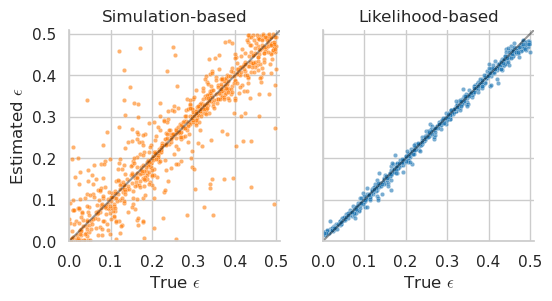

In [206]:
plt.rcParams["mathtext.fontset"] = "cm"

fig, axes = plt.subplots(ncols = 2, nrows = 1, figsize = (6, 3), sharey = True)

max_x = 0.51

axes[0].set_ylabel("Estimated $\epsilon$")

for i, var, title in zip([1,0], ["epsilon_pgabm", "epsilon_msm"], methods_names):
    ax = axes[i]
    ax.margins(x=0, y=0)
    
    ax.plot([0,max_x], [0,max_x], c = "k", alpha = 0.4)
    ax.set_xlim(0,max_x)
    ax.set_ylim(0,max_x)
    ax.axis("square")
    ax.set_xlabel("True $\epsilon$")
    
    ax.set_title(title)
    
    ax.set_xticks(np.arange(0, 0.51, 0.1))
    ax.set_yticks(np.arange(0, 0.51, 0.1))

    
    sns.scatterplot(data = simple_bc_sim.query(cond),
    #sns.scatterplot(data = simple_bc_sim, 
                    x = "real_epsilon", y = var, s = 10, alpha = 0.6,
                    ax = ax, color = sns.color_palette()[np.abs(i -  1)])


sns.despine()

fig.savefig("../paper/fig/scatterplot_epsilon_simple_230807.pdf", format = "pdf", bbox_inches = "tight")
fig.savefig("../paper/fig/scatterplot_epsilon_simple_230807.png", format = "png", bbox_inches = "tight")

### Observe Positive

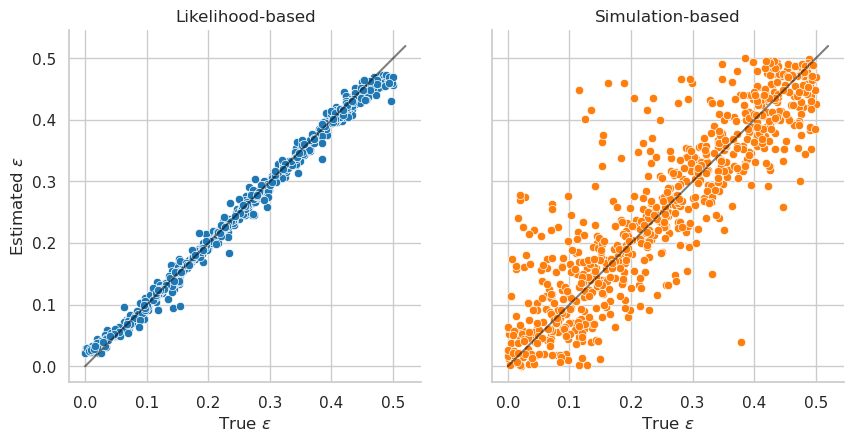

In [106]:
fig, axes = plt.subplots(ncols = 2, nrows = 1, figsize = (10, 5), sharey = True)

max_x = 0.52

axes[0].set_ylabel("Estimated $\epsilon$")

for i, var, title in zip(range(2), ["epsilon_pgabm", "epsilon_msm"], methods_names):
    ax = axes[i]
    
    ax.plot([0,max_x], [0,max_x], c = "k", alpha = 0.5)
    ax.set_xlim(0,max_x)
    ax.set_ylim(0,max_x)
    ax.axis("square")
    ax.set_xlabel("True $\epsilon$")
    
    ax.set_title(title)

    
    sns.scatterplot(data = pos_obs_sim.query(cond), 
#    sns.scatterplot(data = pos_obs_sim, 
                    x = "real_epsilon", y = var, 
                    ax = ax, color = sns.color_palette()[i])


sns.despine()

#fig.savefig("../paper/fig/scatterplot_epsilon_pos_obs_230803.pdf", format = "pdf", bbox_inches = "tight")
#fig.savefig("../paper/fig/scatterplot_epsilon_pos_obs_230803.png", format = "png", bbox_inches = "tight")

### BC with evidences

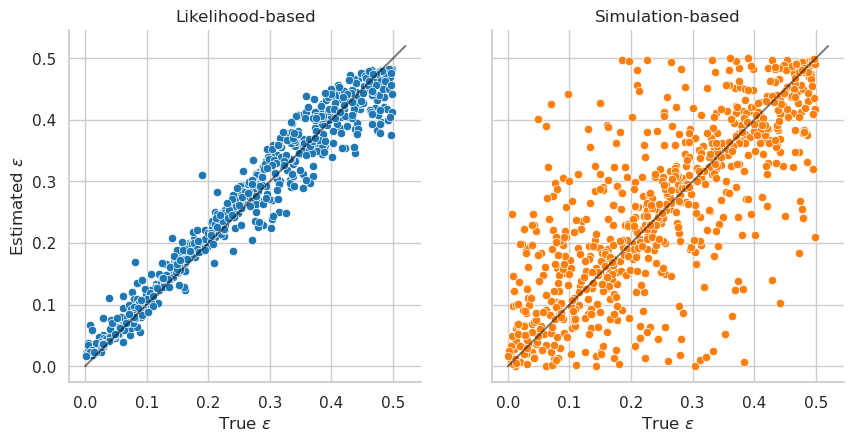

In [108]:
fig, axes = plt.subplots(ncols = 2, nrows = 1, figsize = (10, 5), sharey = True)

max_x = 0.52

axes[0].set_ylabel("Estimated $\epsilon$")

for i, var, title in zip(range(2), ["epsilon_pgabm", "epsilon_msm"], methods_names):
    ax = axes[i]
    
    ax.plot([0,max_x], [0,max_x], c = "k", alpha = 0.5)
    ax.set_xlim(0,max_x)
    ax.set_ylim(0,max_x)
    ax.axis("square")
    ax.set_xlabel("True $\epsilon$")
    
    ax.set_title(title)

    
    sns.scatterplot(data = evidences_sim.query(cond).query("evidences_per_t == 4"), 
#    sns.scatterplot(data = evidences_sim.query("evidences_per_t == 4"),
                    x = "real_epsilon", y = var, 
                    ax = ax, color = sns.color_palette()[i])


sns.despine()

#fig.savefig("../paper/fig/scatterplot_epsilon_evidences_230803.pdf", format = "pdf", bbox_inches = "tight")
#fig.savefig("../paper/fig/scatterplot_epsilon_evidences_230803.png", format = "png", bbox_inches = "tight")

## Error epsilon

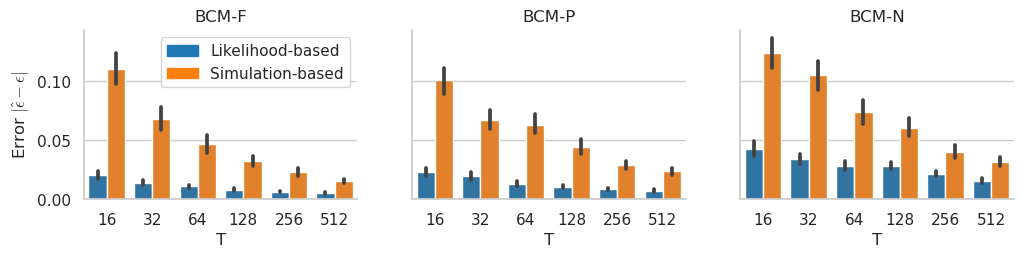

In [204]:
plt.rcParams["mathtext.fontset"] = "cm"
dist_eps_string = r"Error $\vert \hat{\epsilon} - \epsilon \vert$"

sns.set_context("notebook")

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 2.2), sharey = True)

for ax, model, model_name in zip(axes, [simple_bc_sim, pos_obs_sim, evidences_sim.query("evidences_per_t == 4")], 
                                 short_model_names):
    sns.barplot(data = model.set_index(["T", "edge_per_t"])[["abs_error_pgabm", "abs_error_msm"]]\
    #sns.barplot(data = model.set_index(["T", "edge_per_t"]).query(cond)[["abs_error_pgabm", "abs_error_msm"]]\
                .rename(columns = {"abs_error_pgabm": "pgabm", "abs_error_msm": "msm"}).stack().reset_index()\
                .rename(columns = {"level_2": "method", 0: "abs_error"}), 
                x = "T", y = "abs_error", 
                hue = "method", 
                errorbar = ("ci", 95),
                ax = ax
               )
    ax.set_title(model_name)       
    if ax == axes[0]:
        ax.legend(handles = patches, loc = "upper right")
    else:
        ax.legend([],[], frameon = False)
    ax.set_ylabel(dist_eps_string if ax == axes[0] else "")


sns.despine()


fig.savefig("../paper/fig/barplot_shortnames_abs_error_T_methods_230807.pdf", format = "pdf", bbox_inches = "tight")
fig.savefig("../paper/fig/barplot_shortnames_abs_error_T_methods_230807.png", format = "png", bbox_inches = "tight")
#fig.savefig("../paper/fig/barplot_abs_error_methods_T_230807.pdf", format = "pdf", bbox_inches = "tight")
#fig.savefig("../paper/fig/barplot_abs_error_methods_T_230807.png", format = "png", bbox_inches = "tight")

### Edge per t

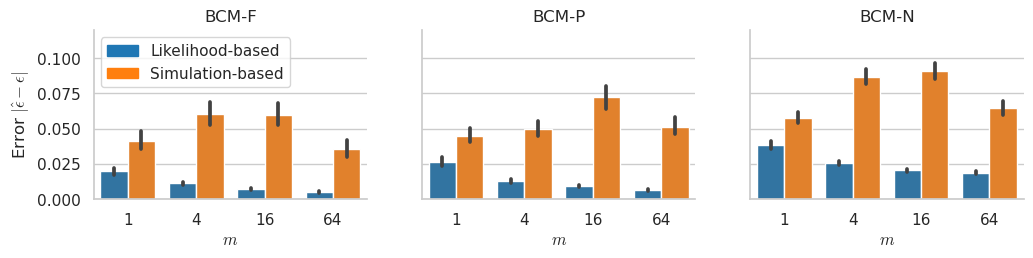

In [205]:
dist_eps_string = r"Error $\vert \hat{\epsilon} - \epsilon \vert$"

sns.set_context("notebook")

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 2.2), sharey = True)

for ax, model, model_name in zip(axes, [simple_bc_sim, pos_obs_sim, evidences_sim], short_model_names):
    #sns.barplot(data = model.query(cond).set_index(["T", "edge_per_t"])[["abs_error_pgabm", "abs_error_msm"]]\
    sns.barplot(data = model.set_index(["T", "edge_per_t"])[["abs_error_pgabm", "abs_error_msm"]]\
                .rename(columns = {"abs_error_pgabm": "pgabm", "abs_error_msm": "msm"}).stack().reset_index()\
                .rename(columns = {"level_2": "method", 0: "abs_error"}), 
                x = "edge_per_t", y = "abs_error", 
                hue = "method", 
                errorbar = ("ci", 95),
                ax = ax
               )
    ax.set_title(model_name)       
    if ax == axes[0]:
        ax.legend(handles = patches, loc = "upper left")
    else:
        ax.legend([],[], frameon = False)
    ax.set_ylabel(dist_eps_string if ax == axes[0] else "")
    ax.set_xlabel("$m$")
    ax.set_ylim(0,0.12)


sns.despine()


fig.savefig("../paper/fig/barplot_shortnames_abs_error_methods_edge_per_t_230807.pdf", format = "pdf", bbox_inches = "tight")
fig.savefig("../paper/fig/barplot_shortnames_abs_error_methods_edge_per_t_230807.png", format = "png", bbox_inches = "tight")
#fig.savefig("../paper/fig/barplot_abs_error_methods_edge_per_t_230807.pdf", format = "pdf", bbox_inches = "tight")
#fig.savefig("../paper/fig/barplot_abs_error_methods_edge_per_t_230807.png", format = "png", bbox_inches = "tight")

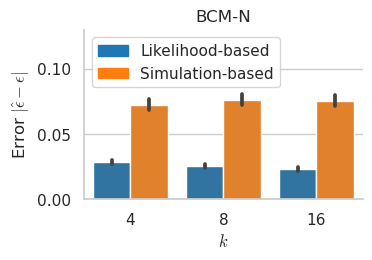

In [207]:
plt.rcParams["mathtext.fontset"] = "cm"
dist_eps_string = r"Error $\vert \hat{\epsilon} - \epsilon \vert$"

sns.set_context("notebook")

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (3.6, 2.2), sharey = True)

for model, model_name in zip([evidences_sim], [short_model_names[-1]]):
#    sns.barplot(data = model.query(cond).set_index(["T", "evidences_per_t"])[["abs_error_pgabm", "abs_error_msm"]]\
    sns.barplot(data = model.set_index(["T", "evidences_per_t"])[["abs_error_pgabm", "abs_error_msm"]]\
                .rename(columns = {"abs_error_pgabm": "pgabm", "abs_error_msm": "msm"}).stack().reset_index()\
                .rename(columns = {"level_2": "method", 0: "abs_error"}), 
                x = "evidences_per_t", y = "abs_error", 
                hue = "method", 
                errorbar = ("ci", 95),
                ax = ax
               )
    ax.set_title(model_name)       
    ax.set_xlabel("$k$")

    ax.legend(handles = patches, loc = "upper left")
    
    ax.set_ylabel(dist_eps_string)
    ax.set_ylim(0, 0.13)


sns.despine()


fig.savefig("../paper/fig/barplot_shortnames_abs_error_methods_evidences_per_t_230807.pdf", format = "pdf", bbox_inches = "tight")
fig.savefig("../paper/fig/barplot_shortnames_abs_error_methods_evidences_per_t_230807.png", format = "png", bbox_inches = "tight")
#fig.savefig("../paper/fig/barplot_abs_error_methods_evidences_per_t_230807.pdf", format = "pdf", bbox_inches = "tight")
#fig.savefig("../paper/fig/barplot_abs_error_methods_evidences_per_t_230807.png", format = "png", bbox_inches = "tight")

In [17]:
for model, model_name in zip([simple_bc_sim, pos_obs_sim, evidences_sim], model_names):
    print(model_name)
    print("Average error pgabm", round(model.mean()["abs_error_pgabm"], 3))
    print("Average error MSM", round(model.mean()["abs_error_msm"], 3))
    print("Average error ratio", round(model.mean()["abs_error_msm"] / model.mean()["abs_error_pgabm"], 3))
    print("")
    

Fully observed
Average error pgabm 0.011
Average error MSM 0.049
Average error ratio 4.536

Partially observed 
Average error pgabm 0.014
Average error MSM 0.055
Average error ratio 3.978

Noisy observations
Average error pgabm 0.026
Average error MSM 0.071
Average error ratio 2.718



In [20]:
for model, model_name in zip([simple_bc_sim, pos_obs_sim, evidences_sim, pd.concat([simple_bc_sim, pos_obs_sim, evidences_sim])],
                             model_names + ["Aggregate"]):
    print(model_name)
    print("Average error pgabm", round(model.median()["abs_error_pgabm"], 3))
    print("Average error MSM", round(model.median()["abs_error_msm"], 3))
    print("Average error ratio", round(model.assign(ratio_error = lambda x: x["abs_error_msm"] / x["abs_error_pgabm"]).median()["ratio_error"], 3))
    print("")
    

Fully observed
Average error pgabm 0.007
Average error MSM 0.026
Average error ratio 3.722

Partially observed 
Average error pgabm 0.008
Average error MSM 0.037
Average error ratio 4.668

Noisy observations
Average error pgabm 0.018
Average error MSM 0.047
Average error ratio 2.641

Aggregate
Average error pgabm 0.011
Average error MSM 0.037
Average error ratio 3.37



## Time

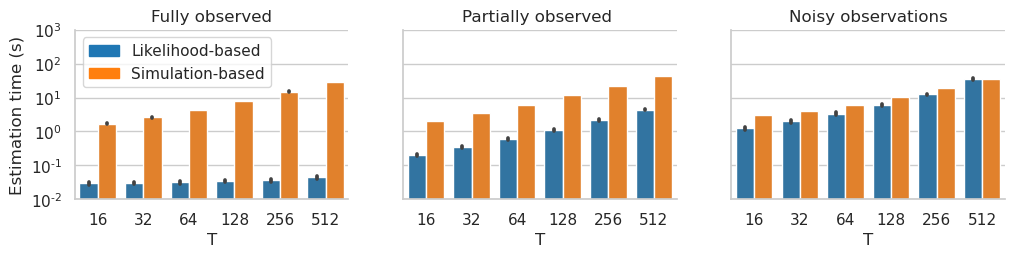

In [208]:
plt.rcParams["mathtext.fontset"] = "cm"

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 2.2), sharey = True)

for ax, model, model_name in zip(axes, [simple_bc_sim, pos_obs_sim, evidences_sim],model_names):
    sns.barplot(data = model.set_index(["T", "edge_per_t"])[["time_pgabm", "time_msm"]]\
                .rename(columns = {"time_pgabm": "pgabm", "time_msm": "msm"}).stack().reset_index()\
                .rename(columns = {"level_2": "method", 0: "time"}), 
                x = "T", y = "time", 
                hue = "method", 
                errorbar = ("ci", 95),
                ax = ax
               )
    ax.set_title(model_name)  
    ax.set_yscale("log")
    if ax == axes[0]:
        ax.legend(handles = patches, loc = "upper left")
    else:
        ax.legend([],[], frameon = False)
    ax.set_ylim(10**-2,10**3)
    ax.set_ylabel("Estimation time (s)" if ax == axes[0] else "")

sns.despine()

fig.savefig("../paper/fig/barplot_time_methods_230807.pdf", format = "pdf", bbox_inches = "tight")
fig.savefig("../paper/fig/barplot_time_methods_230807.png", format = "png", bbox_inches = "tight")
#fig.savefig("../paper/fig/barplot_shortnames_time_methods_230807.pdf", format = "pdf", bbox_inches = "tight")
#fig.savefig("../paper/fig/barplot_shortnames_time_methods_230807.png", format = "png", bbox_inches = "tight")

In [21]:
for model, model_name in zip([simple_bc_sim, pos_obs_sim, evidences_sim, pd.concat([simple_bc_sim, pos_obs_sim, evidences_sim])], 
                             model_names + ["Aggregate"]):
    print(model_name)
    print("Average time pgabm", round(model.median()["time_pgabm"], 3))
    print("Average time MSM", round(model.median()["time_msm"], 3))
    print("Average time ratio", round(model.assign(ratio_time = lambda x: x["time_msm"] / x["time_pgabm"]).median()["ratio_time"], 3))
    print("")
    

Fully observed
Average time pgabm 0.027
Average time MSM 5.888
Average time ratio 208.509

Partially observed 
Average time pgabm 0.806
Average time MSM 8.842
Average time ratio 11.848

Noisy observations
Average time pgabm 3.164
Average time MSM 7.557
Average time ratio 2.524

Aggregate
Average time pgabm 0.854
Average time MSM 6.251
Average time ratio 9.252



## Distribution R2 X0

In [21]:
evidences_sim[["edge_per_t", "T", "evidences_per_t", "X0_r2", "abs_error_msm", "abs_error_pgabm"]].corr()[["X0_r2", "abs_error_pgabm"]]

,X0_r2,abs_error_pgabm
edge_per_t,-0.043810,-0.200801
T,0.352092,-0.294901
evidences_per_t,0.272307,-0.080616
X0_r2,1.000000,-0.319932
abs_error_msm,-0.158980,0.129721
abs_error_pgabm,-0.319932,1.000000


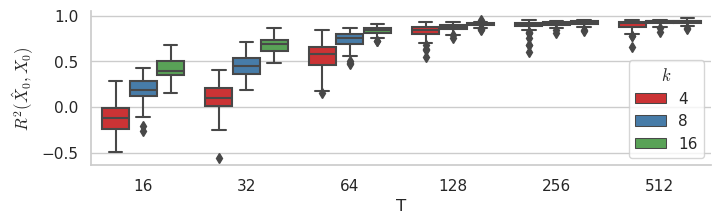

In [209]:
plt.rcParams["mathtext.fontset"] = "cm"

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 2), sharey = True)

   
sns.boxplot(data = evidences_sim.query("edge_per_t == 4"),
            x = "T", y = "X0_r2",
            hue = "evidences_per_t", palette = "Set1")
axes.legend(title = "$k$",loc = "lower right")
axes.set_ylabel("$R^2(\hat{X}_0, X_0)$")
    
    

sns.despine()

fig.savefig("../paper/fig/boxplot_R2_X0_230807.pdf", format = "pdf", bbox_inches = "tight")
fig.savefig("../paper/fig/boxplot_R2_X0_230807.png", format = "png", bbox_inches = "tight")


In [37]:
evidences_sim.query("(edge_per_t == 4)&(T > 64)")["X0_r2"].median()

0.912926197052002

### Mean and Quartiles

In [23]:
simple_bc_sim.apply(lambda x: pd.Series([x.mean(), x.quantile(0.25), x.quantile(0.5), x.quantile(0.75)], 
                                        index = ["mean", "25 percentile", "50 percentile", "75 percentile"]))\
[["abs_error_msm", "time_msm", "abs_error_pgabm", "time_pgabm"]]

,abs_error_msm,time_msm,abs_error_pgabm,time_pgabm
mean,0.049372,10.139341,0.010885,0.034425
25 percentile,0.009948,2.476857,0.002607,0.019209
50 percentile,0.025862,5.887998,0.006569,0.026867
75 percentile,0.061731,14.614224,0.014068,0.042328


In [24]:
pos_obs_sim.apply(lambda x: pd.Series([x.mean(), x.quantile(0.25), x.quantile(0.5), x.quantile(0.75)], 
                                        index = ["mean", "25 percentile", "50 percentile", "75 percentile"]))\
[["abs_error_msm", "time_msm", "abs_error_pgabm", "time_pgabm"]]

,abs_error_msm,time_msm,abs_error_pgabm,time_pgabm
mean,0.054767,14.974726,0.013766,1.477777
25 percentile,0.015590,3.454492,0.003175,0.324547
50 percentile,0.036631,8.842318,0.008436,0.806003
75 percentile,0.071750,22.409676,0.017748,1.967055


In [25]:
evidences_sim.apply(lambda x: pd.Series([x.mean(), x.quantile(0.25), x.quantile(0.5), x.quantile(0.75)], 
                                        index = ["mean", "25 percentile", "50 percentile", "75 percentile"]))\
[["abs_error_msm", "time_msm", "abs_error_pgabm", "time_pgabm", "X0_r2", "X0_mae", "X0_mse"]]

,abs_error_msm,time_msm,abs_error_pgabm,time_pgabm,X0_r2,X0_mae,X0_mse
mean,0.071308,12.579556,0.026237,7.201016,0.633544,0.131869,0.041199
25 percentile,0.020143,3.953270,0.007977,1.186829,0.504542,0.073482,0.008895
50 percentile,0.047540,7.572742,0.017974,3.156197,0.810123,0.100171,0.019310
75 percentile,0.098835,18.723570,0.034985,9.482742,0.908633,0.161049,0.050396


### Single realization

In [48]:
from torcheval.metrics.functional import r2_score

In [49]:
hyperparams_evidence_BC = json.load(open("../data/hyperparams_evidence_bc.json", 'r'))
hyperparams_evidence_BC["summarized"] = False

N, T, edge_per_t = 100, 64, 8
evidences_per_t = 16
rho = 16
set1 = (0.90, 0.92)

In [50]:
r2_score_X0 = -1

while (r2_score_X0 < set1[0])|(r2_score_X0 > set1[1]):
#while (r2_score_X0 < set1[0])|(set1[1] < r2_score_X0 < set2[0]) | (set2[1] < r2_score_X0 < set3[0]) | (r2_score_X0 > set3[1]):
#while (r2_score_X0 < set1[0])|(set1[1] < r2_score_X0 < set3[0]) | (r2_score_X0 > set3[1]):
#while (r2_score_X0 < set1[0])|(r2_score_X0 > set1[1]):
    epsilon, mu = np.random.random(2) / 2
    
    X, edges, evidences = simulate_BC(N, T, edge_per_t, evidences_per_t, (epsilon, mu, rho))
    history = oe.estimation_BC_model_from_data(X, edges, evidences, (epsilon, mu, rho), **hyperparams_evidence_BC)
    
    r2_score_X0 = r2_score(X[0], history["X0"][-1].detach()).item()
    
    print(r2_score_X0)
    
    

0.9053243398666382


In [51]:
median_r2 = [X[0].numpy(), history["X0"][-1].detach().numpy(), r2_score_X0]
#high_r2 = [X[0].numpy(), history["X0"][-1].detach().numpy(), r2_score_X0]
#low_r2 = [X[0].numpy(), history["X0"][-1].detach().numpy(), r2_score_X0]

In [122]:
sample_X0_r2_df = pd.DataFrame([l[0] for l in [low_r2, median_r2, high_r2]]+[l[1] for l in [low_r2, median_r2, high_r2]],
                               index = [z1 + z2 for z1 in ["real_X0_", "estimated_X0_"] for z2 in ["low", "median", "high"]]).T

NameError: name 'low_r2' is not defined

In [277]:
#sample_X0_r2_df.to_csv("/home/jacopo.lenti/Projects/learning-od-step-by-step/data/sample_X0_real_estimate_230727.csv", index = None)

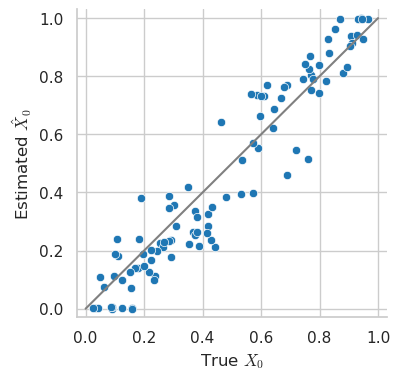

In [210]:
plt.rcParams["mathtext.fontset"] = "cm"

fig, axes = plt.subplots(ncols = 1, nrows = 1, figsize = (4, 4))

#sns.scatterplot(x = high_r2[0], y = high_r2[1], ax = axes[2])
sns.scatterplot(x = median_r2[0], y = median_r2[1])#, ax = axes[1])
#sns.scatterplot(x = low_r2[0], y = low_r2[1], ax = axes[0])
axes.set_xlabel("True $X_0$")
axes.set_ylabel("Estimated $\hat{X}_0$")
sns.despine()
axes.set_xlim(-0.03,1.03)
axes.set_ylim(-0.03,1.03)
sns.lineplot((0,1), color = "grey")

fig.savefig("../paper/fig/realization_median_R2_X0_230803.pdf", format = "pdf", bbox_inches = "tight")
fig.savefig("../paper/fig/realization_median_R2_X0_230803.png", format = "png", bbox_inches = "tight")


## Backfire

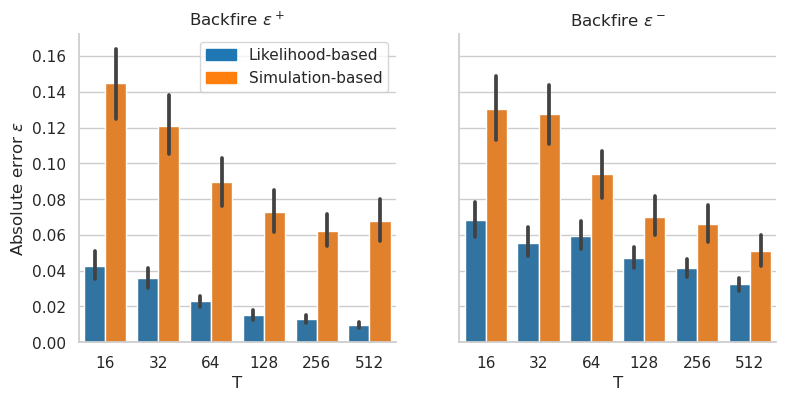

In [673]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (9, 4), sharey = True)

for ax, sign, sign_symbol in zip(axes, ["plus", "minus"], ["+", "-"]):
    sns.barplot(data = backfire_sim.set_index(["T", "edge_per_t"])[["abs_error_pgabm_"+sign, "abs_error_msm_"+sign]]\
                .rename(columns = {"abs_error_pgabm_"+sign: "pgabm", "abs_error_msm_"+sign: "msm"}).stack().reset_index()\
                .rename(columns = {"level_2": "method", 0: "abs_error"}), 
                x = "T", y = "abs_error", 
                hue = "method", 
                errorbar = ("ci", 95),
                ax = ax
               )
    ax.set_title(f"Backfire $\epsilon^{sign_symbol}$")
    #ax.set_yscale("log")
    if ax == axes[0]:
        ax.legend(handles = patches)
    else:
        ax.legend([],[], frameon = False)
    ax.set_ylabel("Absolute error $\epsilon$" if ax == axes[0] else "")

    

sns.despine()

#fig.savefig("../paper/fig/barplot_rel_error_methods_230727.pdf", format = "pdf", bbox_inches = "tight")
#fig.savefig("../paper/fig/barplot_rel_error_methods_230727.png", format = "png", bbox_inches = "tight")

In [674]:
backfire_sim.columns

Index(['ensemble_size', 'calibration_batches', 'edge_per_t', 'evidences_per_t',
       'T', 'real_epsilon_plus', 'real_epsilon_minus', 'mu_plus', 'mu_minus',
       'rho', 'epsilon_plus_msm', 'epsilon_minus_msm', 'time_msm',
       'abs_error_msm_plus', 'abs_error_msm_minus', 'rel_error_msm_plus',
       'rel_error_msm_minus', 'epsilon_plus_pgabm', 'epsilon_minus_pgabm',
       'time_pgabm', 'abs_error_pgabm_plus', 'abs_error_pgabm_minus',
       'rel_error_pgabm_plus', 'rel_error_pgabm_minus', 'X0_r2', 'X0_mae',
       'X0_mse'],
      dtype='object')

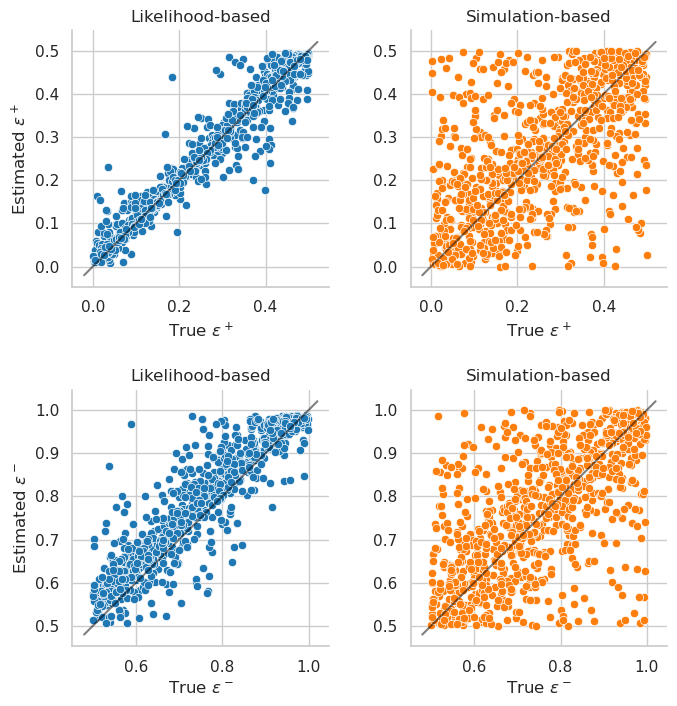

In [675]:
fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize = (8, 8))
plt.subplots_adjust(hspace = 0.4)

for i, sign, sign_symbol in zip(range(2), ["plus", "minus"], ["+", "-"]):
    xmin, xmax = np.array([-0.02, 0.52])  + 0.5 * i
    for j, model_name, title in zip(range(2), ["pgabm", "msm"], methods_names):
        ax = axes[i,j]

        ax.plot([xmin, xmax], [xmin, xmax], c = "k", alpha = 0.5)
        ax.set_xlim(xmin, xmax)
        ax.set_ylim(xmin, xmax)
        ax.axis("square")
        ax.set_xlabel(f"True $\epsilon^{sign_symbol}$")

        ax.set_title(title)


        sns.scatterplot(data = backfire_sim, 
                        x = f"real_epsilon_{sign}", y = f"epsilon_{sign}_{model_name}", 
                        ax = ax, color = sns.color_palette()[j])
        
        ax.set_ylabel(f"Estimated $\epsilon^{sign_symbol}$" if j == 0 else "")



sns.despine()

#fig.savefig("../paper/fig/scatterplot_epsilon_evidences_230727.pdf", format = "pdf", bbox_inches = "tight")
#fig.savefig("../paper/fig/scatterplot_epsilon_evidences_230727.png", format = "png", bbox_inches = "tight")

## MSM tuning

In [212]:
msm_tuning = pd.read_csv(f"/home/jacopo.lenti/Projects/learning-od-step-by-step/data/tuning_calibration_batches_all_simulators_230801.csv")

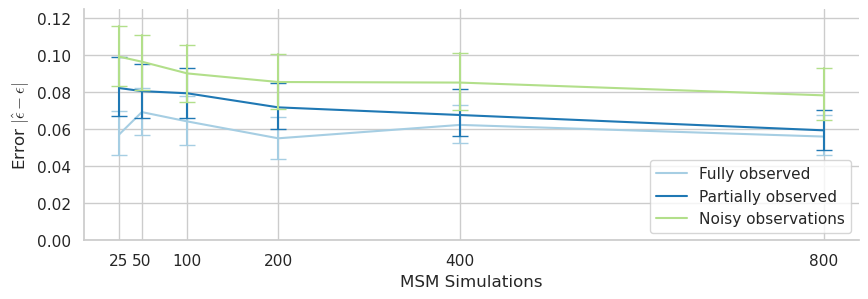

In [213]:
plt.rcParams["mathtext.fontset"] = "cm"
fig, axes = plt.subplots(ncols = 1, nrows = 1, figsize = (10, 3))

sns.lineplot(data = msm_tuning, x = "calibration_batches", 
             hue = "simulator_name", y =  "distance_epsilon", 
             palette = "Paired", err_style = "bars",
             err_kws = {"capsize": 6})

axes.set_ylim(0, 0.125)

cols, _ = axes.get_legend_handles_labels()
axes.legend(cols, model_names, loc = "lower right")
axes.set_ylabel(r"Error $\vert \hat{\epsilon} - \epsilon \vert$")
axes.set_xlabel("MSM Simulations")
    
axes.set_xticks([25, 50, 100, 200, 400, 800])

sns.despine()

fig.savefig("../paper/fig/tuning_msm_230803.pdf", format = "pdf", bbox_inches = "tight")
fig.savefig("../paper/fig/tuning_msm_230803.png", format = "png", bbox_inches = "tight")

### Printed Results

In [165]:
for model, model_name in zip(models + [pd.concat(models)], model_names + ["Aggregate"]):
    print("Median delta epsilon ratio", model_name, 
          round(model.assign(delta_ratio_epsilon = lambda x: x["abs_error_msm"] / x["abs_error_pgabm"]).median()["delta_ratio_epsilon"], 3))

Median delta epsilon ratio Fully observed 3.722
Median delta epsilon ratio Partially observed  4.668
Median delta epsilon ratio Noisy observations 2.589
Median delta epsilon ratio Aggregate 3.123


In [171]:
for err_var, method_name in zip(["abs_error_pgabm", "abs_error_msm"], methods_names):
    print(method_name, pd.concat(models)[err_var].median())

Likelihood-based 0.0129257171713277
Simulation-based 0.0397637456204715


In [172]:
for model, model_name in zip(models + [pd.concat(models)], model_names + ["Aggregate"]):
    print("Median time ratio", model_name, 
          round(model.assign(time_ratio = lambda x: x["time_msm"] / x["time_pgabm"]).median()["time_ratio"], 3))

Median time ratio Fully observed 208.509
Median time ratio Partially observed  11.848
Median time ratio Noisy observations 2.308
Median time ratio Aggregate 4.042


In [173]:
for time_var, method_name in zip(["time_pgabm", "time_msm"], methods_names):
    print(method_name, pd.concat(models)[time_var].median())

Likelihood-based 1.5579450130462646
Simulation-based 7.475824356079102


In [178]:
print("Median R2 high T", round(evidences_sim.query("T>64").median()["X0_r2"], 4))

Median R2 high T 0.8998


In [182]:
evidences_sim.median()[["X0_r2", "X0_mae", "X0_mse"]]

X0_r2     0.813010
X0_mae    0.098029
X0_mse    0.018674
dtype: float64

### Tables

In [225]:
print(simple_bc_sim.groupby(["T", "edge_per_t"]).median().apply(lambda x: round(x, 3))\
      [["abs_error_pgabm","abs_error_msm", "time_pgabm",  "time_msm"]]\
      .rename(index = {"edge_per_t": "m"}, 
              columns = {"time_pgabm": "t_{ML}", "time_msm": "t_{MSM}", "abs_error_pgabm": "\delta_{ML}", "abs_error_msm": "\delta_{MSM}"})\
      .to_latex())


\begin{tabular}{llrrrr}
\toprule
    &    &  \textbackslash delta\_\{ML\} &  \textbackslash delta\_\{MSM\} &  t\_\{ML\} &  t\_\{MSM\} \\
T & edge\_per\_t &              &               &         &          \\
\midrule
16  & 1  &        0.024 &         0.086 &   0.025 &    1.434 \\
    & 4  &        0.019 &         0.084 &   0.024 &    1.598 \\
    & 16 &        0.013 &         0.096 &   0.025 &    1.599 \\
    & 64 &        0.005 &         0.068 &   0.025 &    1.604 \\
32  & 1  &        0.025 &         0.041 &   0.025 &    2.123 \\
    & 4  &        0.013 &         0.067 &   0.026 &    2.471 \\
    & 16 &        0.007 &         0.069 &   0.024 &    2.474 \\
    & 64 &        0.004 &         0.035 &   0.022 &    2.484 \\
64  & 1  &        0.017 &         0.030 &   0.030 &    3.508 \\
    & 4  &        0.011 &         0.044 &   0.025 &    4.212 \\
    & 16 &        0.007 &         0.048 &   0.024 &    4.216 \\
    & 64 &        0.003 &         0.010 &   0.023 &    4.241 \\
128 & 1  &    

/tmp/ipykernel_969863/3418898831.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(simple_bc_sim.groupby(["T", "edge_per_t"]).median().apply(lambda x: round(x, 3))\


In [226]:
print(pos_obs_sim.groupby(["T", "edge_per_t"]).median().apply(lambda x: round(x, 3))\
      [["abs_error_pgabm","abs_error_msm", "time_pgabm",  "time_msm"]]\
      .rename(index = {"edge_per_t": "m"}, 
              columns = {"time_pgabm": "t_{ML}", "time_msm": "t_{MSM}", "abs_error_pgabm": "\delta_{ML}", "abs_error_msm": "\delta_{MSM}"})\
      .to_latex())


\begin{tabular}{llrrrr}
\toprule
    &    &  \textbackslash delta\_\{ML\} &  \textbackslash delta\_\{MSM\} &  t\_\{ML\} &  t\_\{MSM\} \\
T & edge\_per\_t &              &               &         &          \\
\midrule
16  & 1  &        0.034 &         0.078 &   0.197 &    2.084 \\
    & 4  &        0.021 &         0.079 &   0.173 &    2.093 \\
    & 16 &        0.011 &         0.099 &   0.166 &    2.086 \\
    & 64 &        0.008 &         0.076 &   0.173 &    2.099 \\
32  & 1  &        0.035 &         0.041 &   0.290 &    3.432 \\
    & 4  &        0.014 &         0.047 &   0.287 &    3.465 \\
    & 16 &        0.011 &         0.065 &   0.298 &    3.449 \\
    & 64 &        0.005 &         0.048 &   0.292 &    3.474 \\
64  & 1  &        0.024 &         0.032 &   0.514 &    6.130 \\
    & 4  &        0.010 &         0.044 &   0.522 &    6.175 \\
    & 16 &        0.008 &         0.079 &   0.506 &    6.158 \\
    & 64 &        0.003 &         0.045 &   0.536 &    6.201 \\
128 & 1  &    

/tmp/ipykernel_969863/1583964789.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pos_obs_sim.groupby(["T", "edge_per_t"]).median().apply(lambda x: round(x, 3))\


In [227]:
print(evidences_sim.groupby(["T", "edge_per_t", "evidences_per_t"]).median().apply(lambda x: round(x, 3))\
      [["abs_error_pgabm","abs_error_msm", "time_pgabm",  "time_msm"]]\
      .rename(index = {"edge_per_t": "m"}, 
              columns = {"time_pgabm": "t_{ML}", "time_msm": "t_{MSM}", "abs_error_pgabm": "\delta_{ML}", "abs_error_msm": "\delta_{MSM}"})\
      .to_latex())


\begin{tabular}{lllrrrr}
\toprule
    &    &    &  \textbackslash delta\_\{ML\} &  \textbackslash delta\_\{MSM\} &  t\_\{ML\} &  t\_\{MSM\} \\
T & edge\_per\_t & evidences\_per\_t &              &               &         &          \\
\midrule
16  & 1  & 4  &        0.048 &         0.066 &   1.112 &    2.771 \\
    &    & 8  &        0.061 &         0.093 &   0.911 &    2.754 \\
    &    & 16 &        0.065 &         0.074 &   0.896 &    2.749 \\
    & 4  & 4  &        0.047 &         0.103 &   0.757 &    2.896 \\
    &    & 8  &        0.030 &         0.125 &   0.848 &    2.896 \\
    &    & 16 &        0.037 &         0.118 &   0.754 &    2.894 \\
    & 16 & 4  &        0.022 &         0.122 &   0.702 &    2.898 \\
    &    & 8  &        0.023 &         0.126 &   0.640 &    2.897 \\
    &    & 16 &        0.022 &         0.112 &   0.713 &    2.901 \\
    & 64 & 4  &        0.016 &         0.107 &   0.666 &    2.905 \\
    &    & 8  &        0.017 &         0.126 &   0.581 &    2.921 

/tmp/ipykernel_969863/342178841.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(evidences_sim.groupby(["T", "edge_per_t", "evidences_per_t"]).median().apply(lambda x: round(x, 3))\
